In [88]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [90]:
#1) Acquiring data and importing the data
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/infy.csv')

In [91]:
#2) Data Preprocessing for Time Series Data
data['DATE'] = pd.to_datetime(data.DATE,format='%Y-%m-%d')
data.index = data['DATE']

In [92]:
data.dtypes

DATE            datetime64[ns]
OPEN                   float64
HIGH                   float64
LOW                    float64
PREV. CLOSE            float64
VOLUME                 float64
VALUE                  float64
NO OF TRADES           float64
CLOSE                  float64
dtype: object

In [93]:
# 3) Data Cleaning: Handling Missing Values
data.dropna(inplace=True)

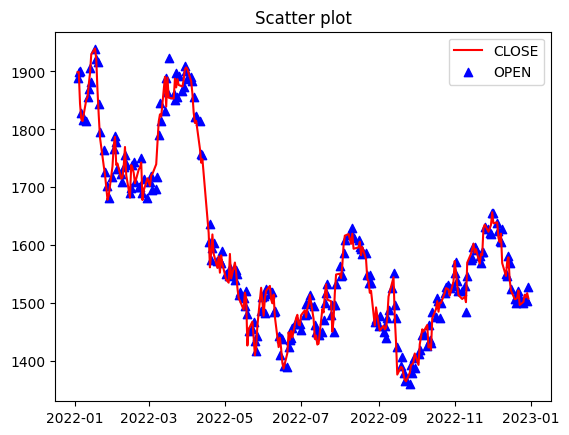

In [94]:
#Scatter Plot
plt.title("Scatter plot")
plt.plot(data['DATE'],data['CLOSE '],c = 'red' )
plt.scatter(data['DATE'],data['OPEN'],c = 'blue', marker = '^')
plt.legend(['CLOSE','OPEN'])

# Inference No.1:
The above graph shows a scatter plot of the 'OPEN' and 'CLOSE' prices of the INFY stock

<ipython-input-95-c04541ba67ba>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr() > 0.9, annot=True, cbar=False)


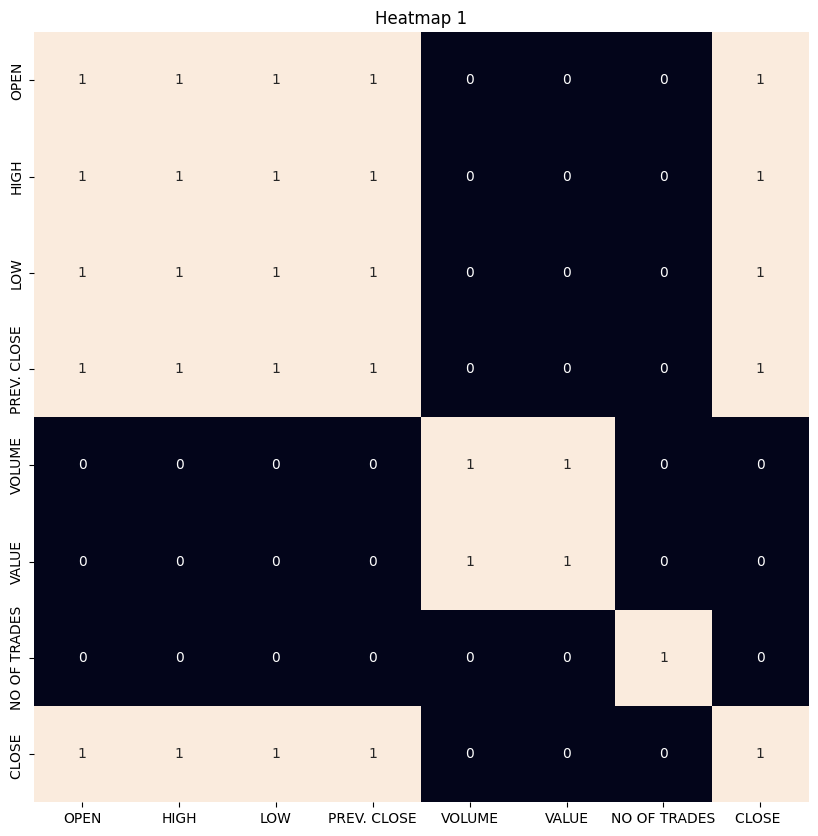

In [95]:
# HEATMAP 1

plt.figure(figsize=(10, 10))
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(data.corr() > 0.9, annot=True, cbar=False)
plt.title("Heatmap 1")
plt.show()


# Inference No.2:

*   The above heatmap is created using Seaborn library
*   We are concerned only with the highly
 correlated features so, we will visualize
 our heatmap as per that criteria only.

<ipython-input-96-dc05998d9560>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


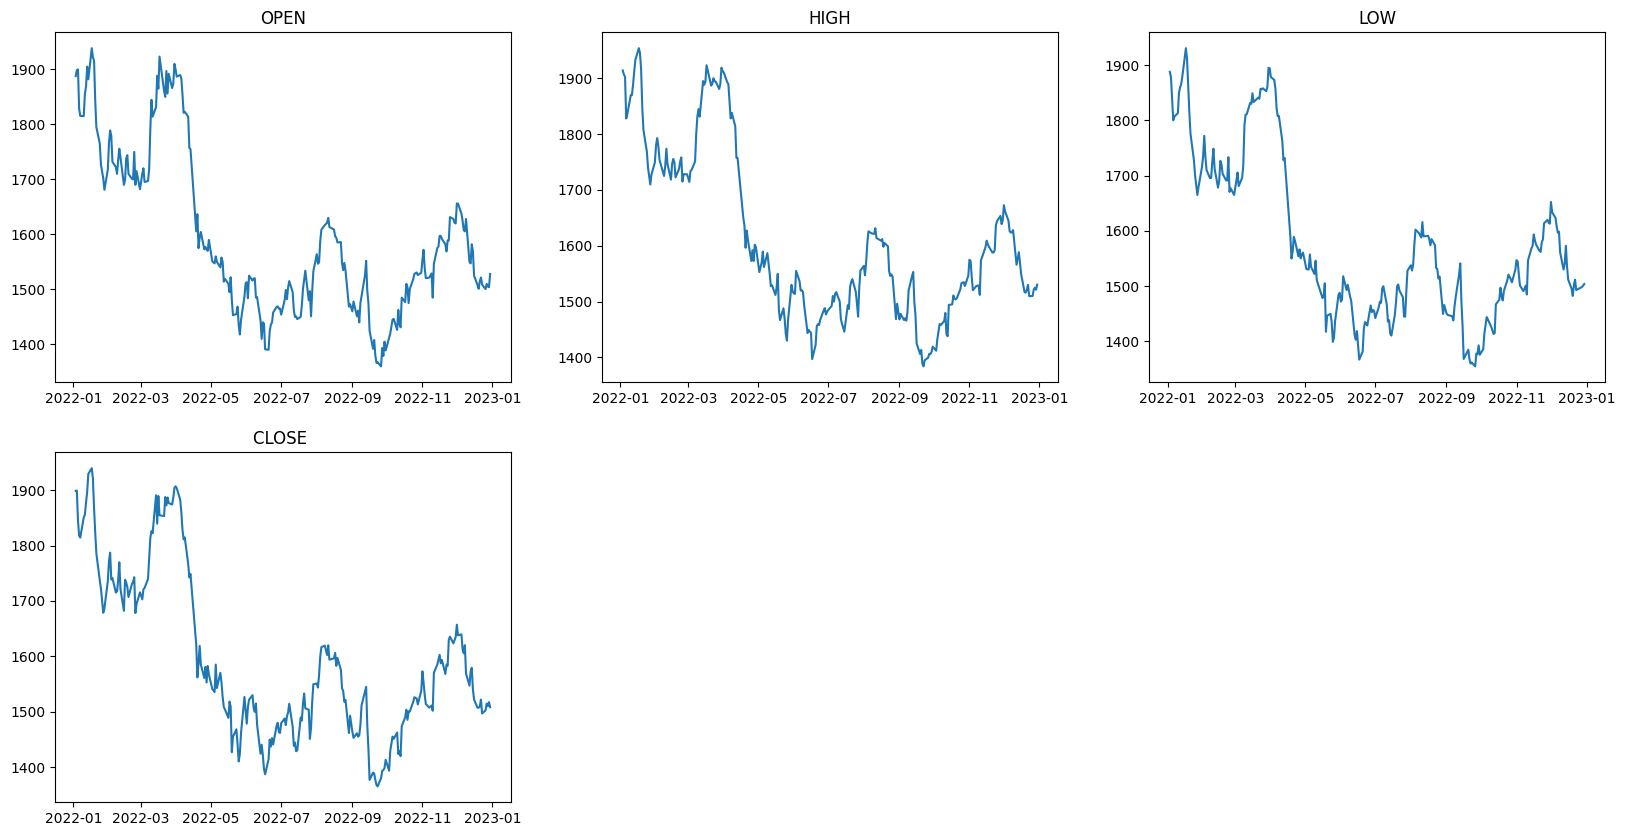

In [96]:
# OHLC charts
plt.subplots(figsize=(20,10))

for i,cols in enumerate(['OPEN','HIGH','LOW','CLOSE ']):
    plt.subplot(2,3,i+1)
    plt.title(cols)
    plt.plot(data[cols])
plt.show()

# Inference No.3:
The above subplot shows the data of the columns ***`'OPEN', 'HIGH', 'LOW','CLOSE '`*** in the dataset.

<ipython-input-97-ff1f4a12582a>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


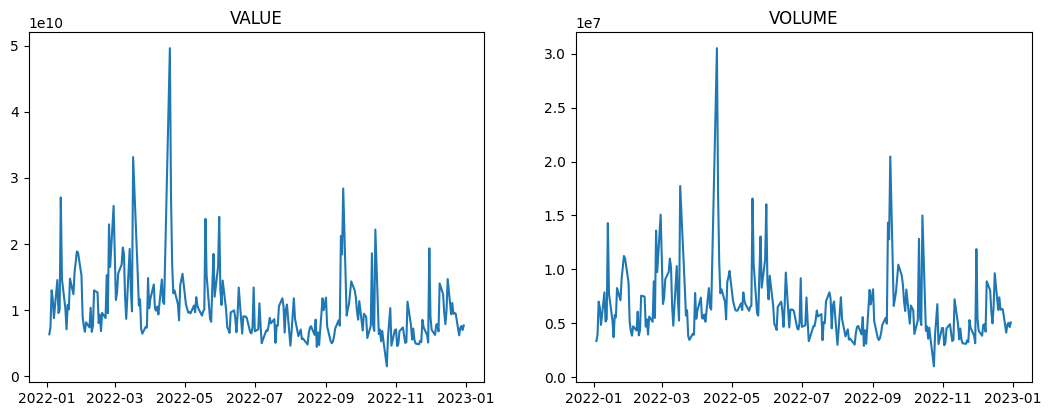

In [97]:
# VALUE and VOLUME charts
plt.subplots(figsize=(20,10))

for i,cols in enumerate(['VALUE','VOLUME']):
    plt.subplot(2,3,i+1)
    plt.title(cols)
    plt.plot(data[cols])
plt.show()

# Inference No.4:
The above subplot shows the data of the columns `'VALUE','VOLUME'` in the dataset.

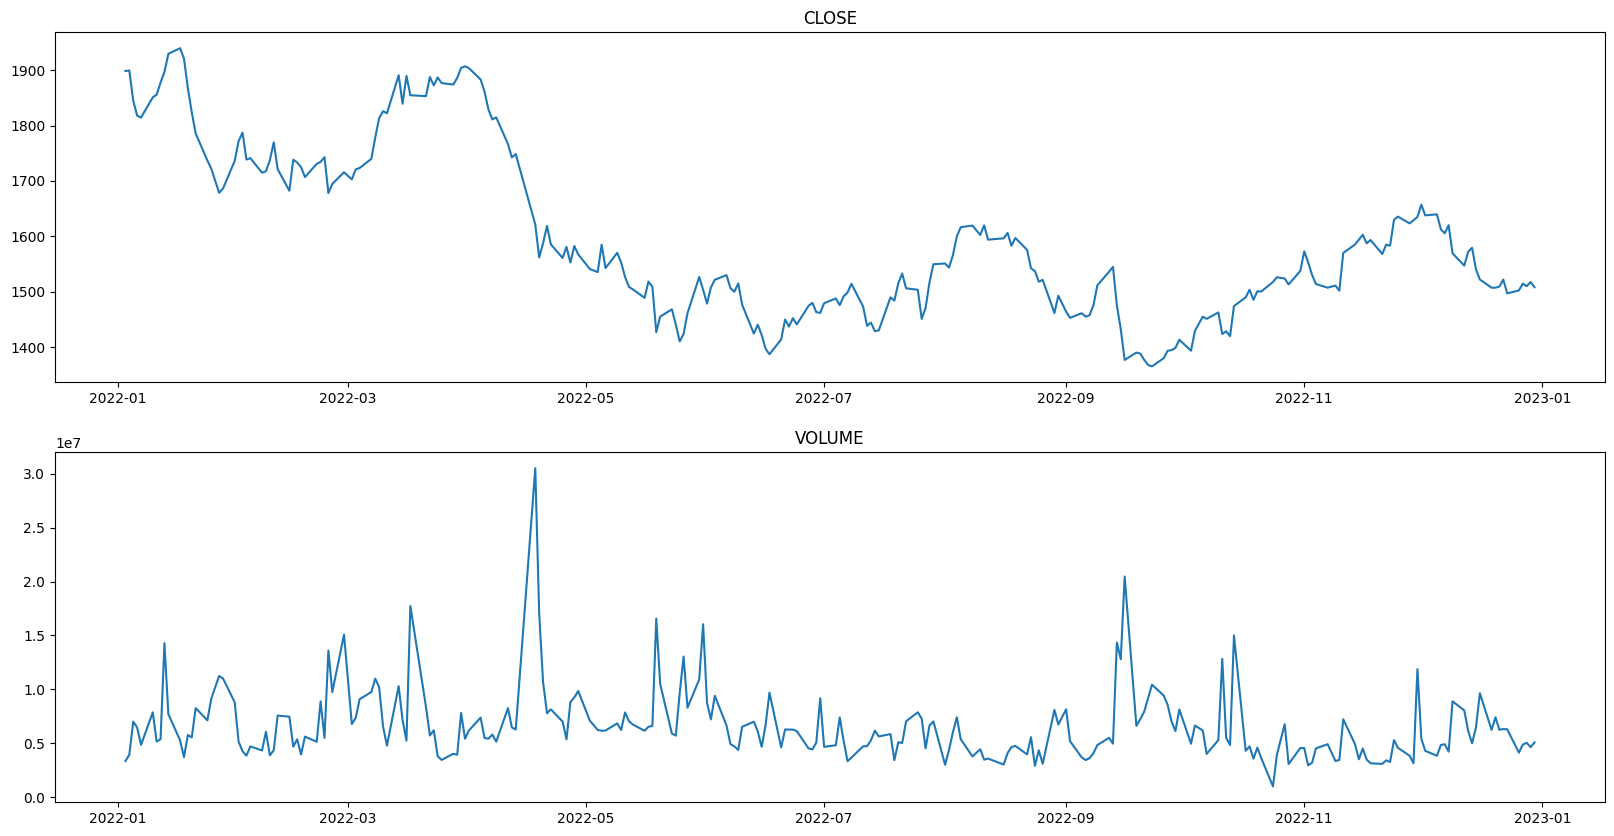

In [98]:

fig, axs = plt.subplots(2, figsize=(20,10))

axs[0].plot(data['CLOSE '])
axs[0].set_title("CLOSE")
axs[1].plot(data['VOLUME'])
axs[1].set_title("VOLUME")
plt.show()

# Inference No.5:

   We observe in the past year (January 01,2022 - January 01,2023), the closing price of each INFY share has been decreasing with the lowest being in the month of OCTOBER, but the value of the Infosys Company remains the same throughout the year (except with a spike in the month of April).


<ipython-input-99-40f3040dfb60>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
<ipython-input-99-40f3040dfb60>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])
<ipython-input-99-40f3040dfb60>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the n

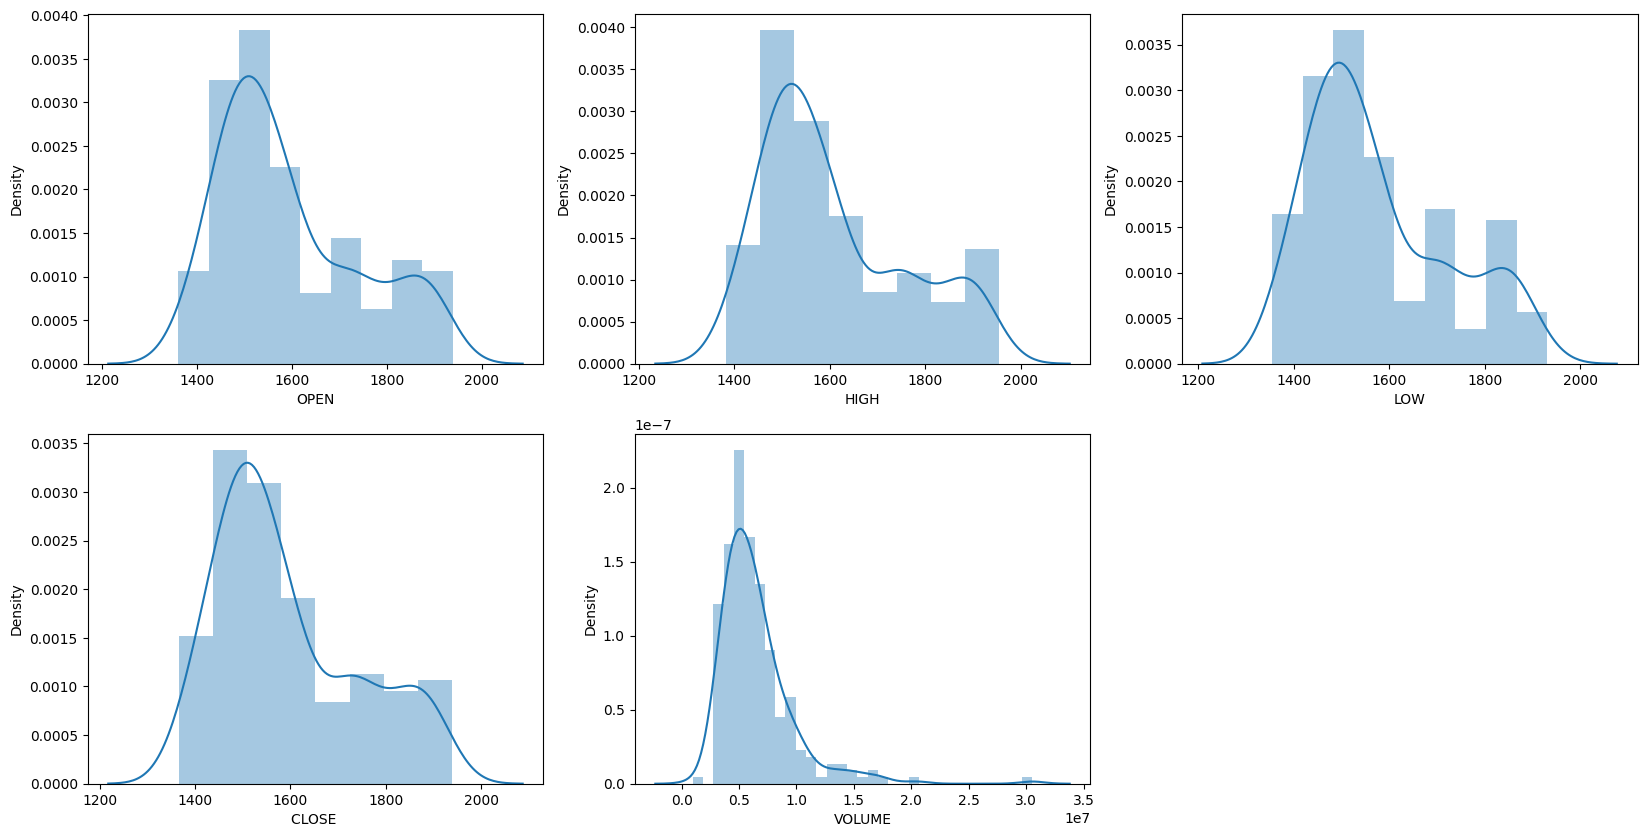

In [99]:

ohlc = ['OPEN', 'HIGH', 'LOW', 'CLOSE ', 'VOLUME']

plt.subplots(figsize=(20,10))

for i, col in enumerate(ohlc):
  plt.subplot(2,3,i+1)
  sb.distplot(data[col])
plt.show()

# Inference No.6:


1.   For the above **Distribution plot**, I've used Seaborn libary's distplot function. We can also use seaborn.histplot()
2.   In the distribution plot of OHLC data, we can see one peak towards the left and a small hill towards the right, which means the data has not varied significantly in two regions.
And the Volume data is left-skewed.



<ipython-input-100-a1fa3407fbeb>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = data.groupby('month').mean()
<ipython-input-100-a1fa3407fbeb>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


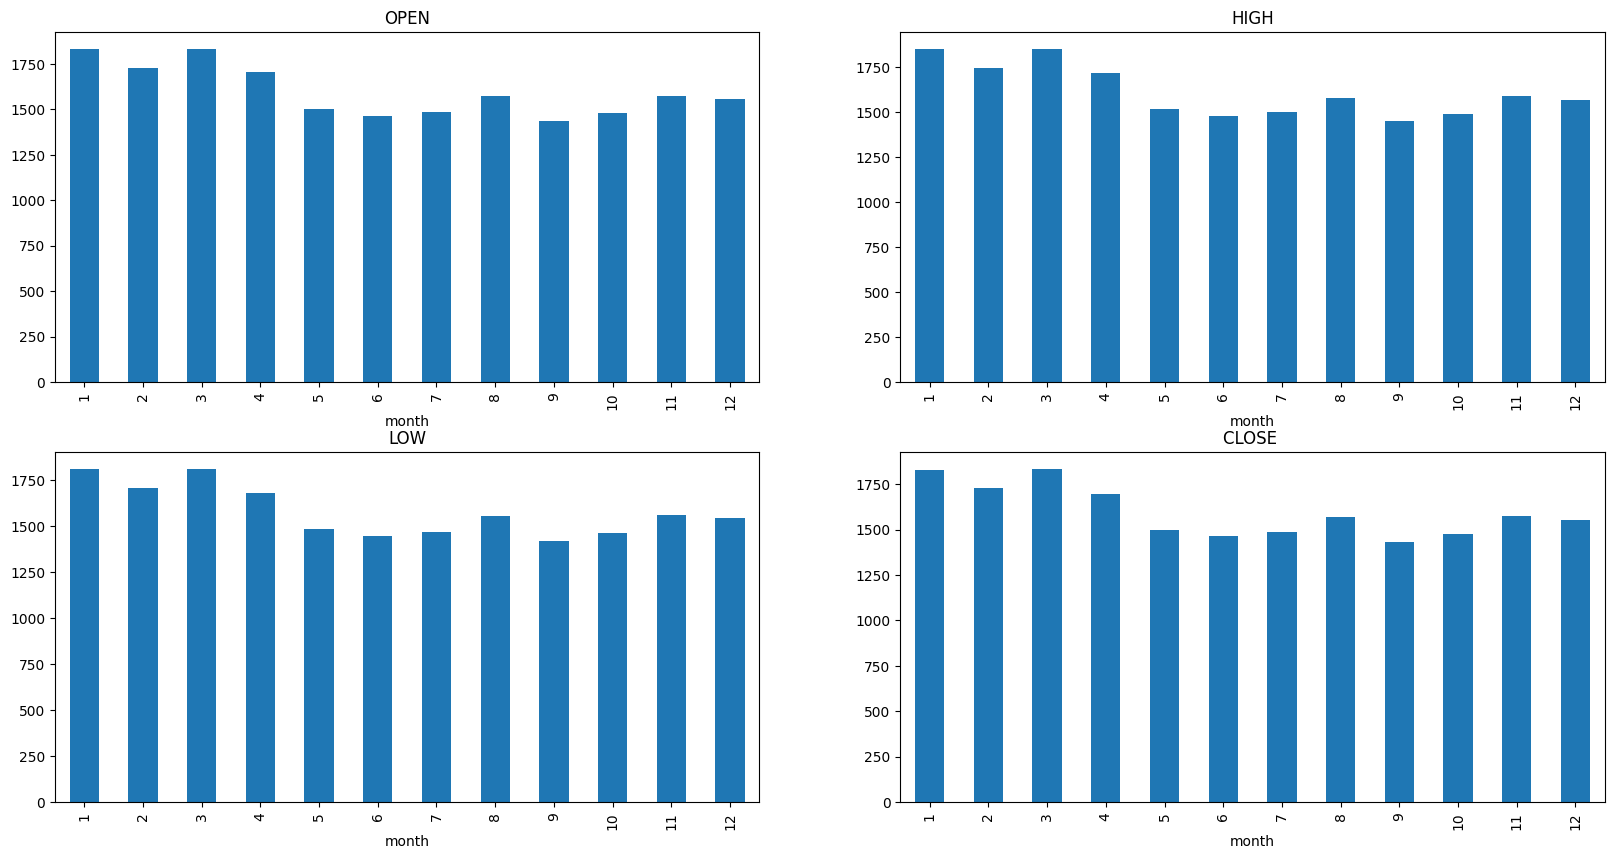

In [100]:


data['day'] = data.index.day
data['month'] = data.index.month
data['year'] = data.index.year

data['is_quarter_end'] = np.where(data['month']%3==0,1,0)
data_grouped = data.groupby('month').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['OPEN', 'HIGH', 'LOW', 'CLOSE ']):

    plt.subplot(2,2,i+1)
    plt.title(col)
    data_grouped[col].plot.bar()
plt.show()

# Inference No.7:


1.   I have now plotted 4 histograms to compare the prices of Infosys stock for the past year from January to December
2.   We observe that, the price has not fluctuated much.
But still there is the change of few Hundreds. We see that the highest price has achieved in the month of March and the lowest price in June. The rest of the year has performed average.



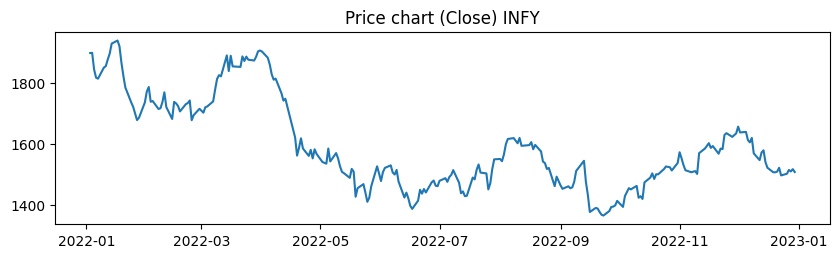

In [101]:
plt.figure(figsize=(10,2.5))
plt.plot(data['DATE'], data['CLOSE '])
plt.title('Price chart (Close) INFY')
plt.show()

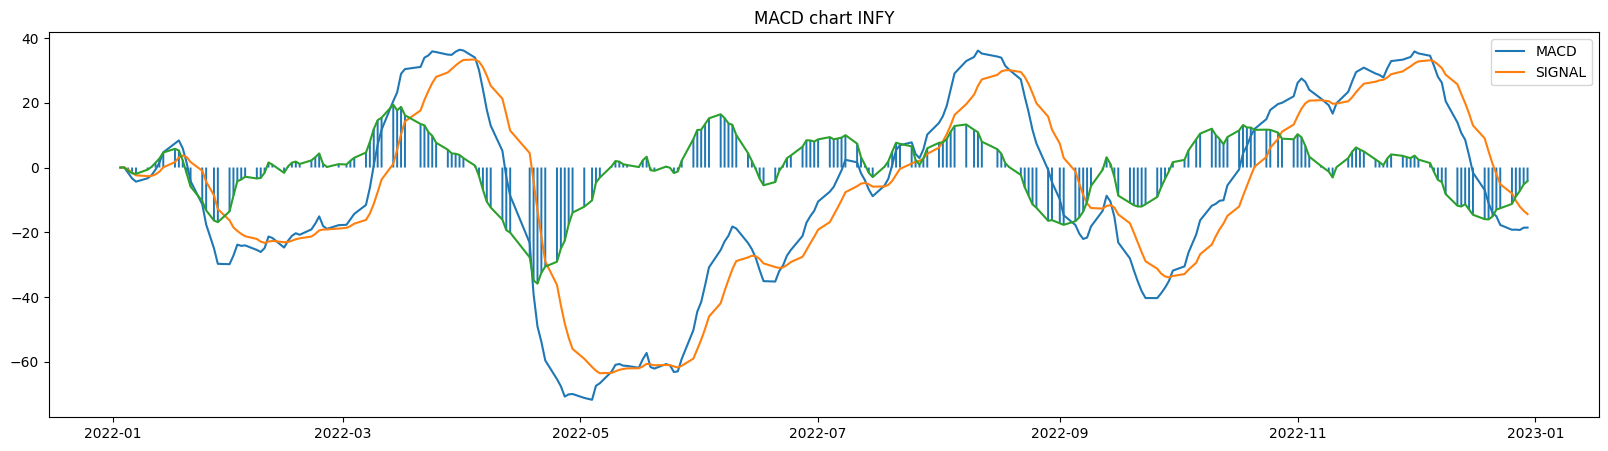

In [102]:
import yfinance as yf
data['ema12'] = data['CLOSE '].ewm(span=12).mean ()
data['ema26'] = data['CLOSE '].ewm(span=26).mean ()
data['macd'] = data['ema12']- data['ema26']
data['macd_signal'] = data['macd']. ewm (span=9). mean ()
data['macd_histogram'] = data['macd'] - data['macd_signal']

plt.figure(figsize=(20,5))
plt.title('MACD chart INFY')
plt.plot(data['DATE'], data['macd'].fillna(0))
plt.plot(data['DATE'], data['macd_signal'].fillna(0))
plt.plot(data['DATE'], data['macd_histogram'].fillna(0))
plt.bar(data['DATE'], data['macd_histogram'].fillna(0), width=0.5, snap=False)
plt.legend(['MACD','SIGNAL'])
plt.show()

# Inference No.8:


#1.    What Exponential Moving Average (EMA) ?

*
EMA is a type of Moving Average (MA) that automatically allocates greater weighting (nothing but importance) to the most recent data point and lesser weighting to data points in the distant past.

#2.   What Exponential Moving Average (MACD) ?

*
MACD is a trend-following leading indicator that is calculated by subtracting two Exponential Moving Averages (one with longer and the other shorter periods).
* This indicator serves as a momentum indicator that can help signal shifts in market momentum and help signal potential breakouts.




<ipython-input-103-d20874c30c25>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr() > 0.9, annot=True, cbar=False)


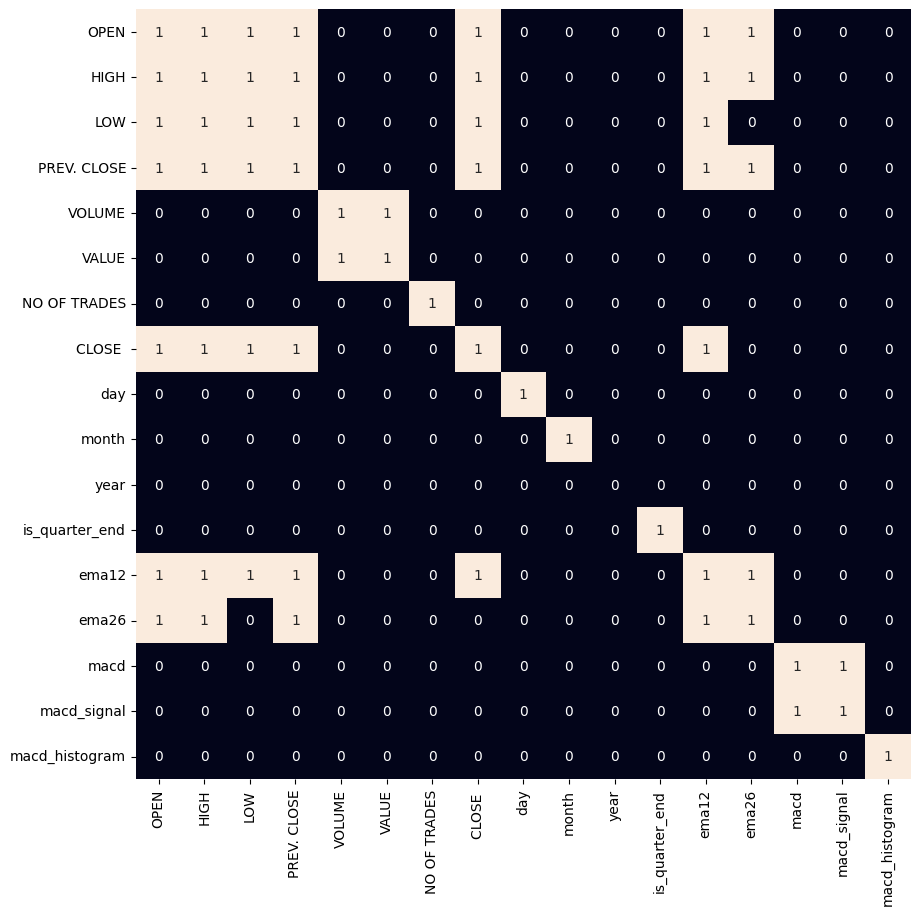

In [103]:
plt.figure(figsize=(10, 10))

sb.heatmap(data.corr() > 0.9, annot=True, cbar=False)
plt.show()

#Inference No.9:


1.  The above heatmap is created using Seaborn library `sb.heatmap()`
2. From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.  




In [104]:
#5) Selecting the feature set and target variable :Feature Selection
target_var = pd.DataFrame(data['CLOSE '])
features = data[['OPEN', 'HIGH', 'LOW', 'VOLUME','VALUE','NO OF TRADES']]

In [105]:
#6) Scaling the features to a particular range: Feature Scaling
scaler = StandardScaler()
feature_transform = scaler.fit_transform(features)
feature_transform

array([[ 1.98529864,  2.04350884,  2.12743227, -0.97026931, -0.75730571,
        -0.72925669],
       [ 2.05760303,  1.99393626,  2.06069657, -0.78956722, -0.5565383 ,
        -0.79112952],
       [ 2.06807703,  1.96881503,  1.80059846,  0.14804856,  0.49582919,
         0.60358175],
       ...,
       [-0.60042809, -0.56307098, -0.53686221, -0.45162233, -0.52039453,
        -0.64300246],
       [-0.60786126, -0.58752232, -0.51975049, -0.5751997 , -0.63523884,
        -0.82834062],
       [-0.44568318, -0.52656144, -0.4988742 , -0.4422624 , -0.50471173,
        -0.76349947]])

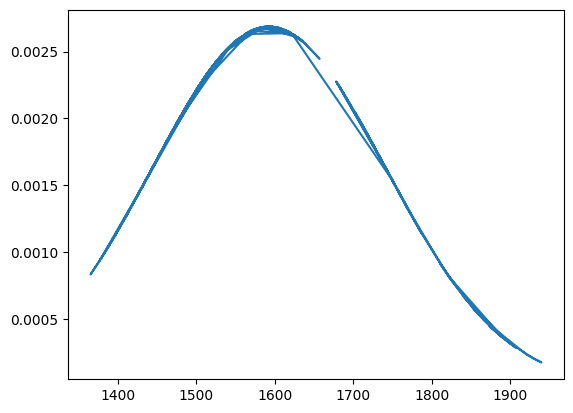

In [106]:
from scipy.stats import norm
import statistics


x_axis = target_var['CLOSE ']

# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)

plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

# Inference No.10:

#1.  What is Normal Distribution?


*   Normal Distribution is a probability function used in statistics that tells about how the data values are distributed. It is the most important probability distribution function used in statistics because of its advantages in real case scenarios.


#2.  For the above graph, we calculate the mean and standard deviation using the statistics library.

*   We then calculate the normalised value using probability density function using norm.pdf
*   The graph is plotted using matplotlib.pyplot




In [107]:
#7) Splitting the dataset into Train set and Test set by 80/20
X_train, X_test, y_train, y_test = train_test_split(feature_transform, target_var, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(198, 6) (50, 6) (198, 1) (50, 1)
